In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
train  = pd.read_csv("train_sem12.csv")

/home/alex/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
stores = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/store_sem12.csv")

In [7]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train.shape

(1017209, 9)

In [9]:
stores.shape

(1115, 10)

In [10]:
data = pd.merge(train, stores) #'on = store'

In [11]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [12]:
# train test split
idxs = np.random.permutation(np.arange(data.shape[0]))
train_idxs = idxs[:len(idxs)//2]
test_idxs = idxs[len(idxs)//2:]

In [17]:
data.columns.shape


(18,)

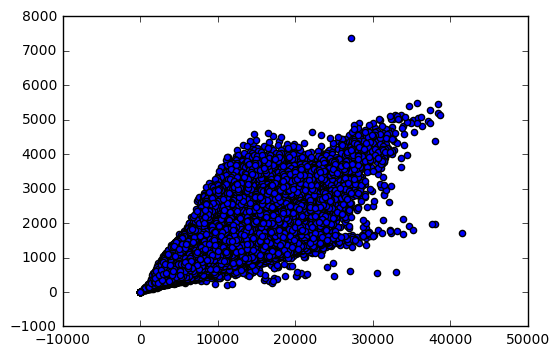

In [18]:
plt.scatter(train["Sales"],train["Customers"])

In [19]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(1)

In [28]:
z = pca.fit_transform(train[["Sales","Customers"]])

In [32]:
vector = pca.components_[0]


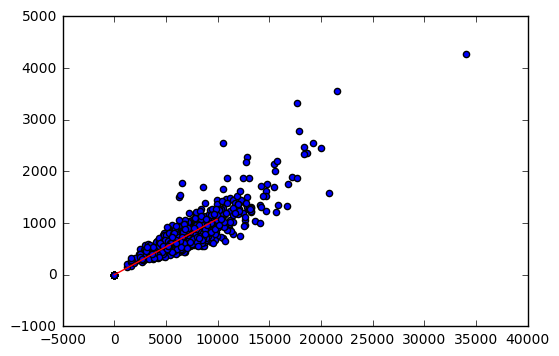

In [33]:
plt.scatter(train["Sales"][::1000],train["Customers"][::1000])
plt.plot([0,vector[0]*10000],[0,vector[1]*10000],color="red")

In [35]:
### Часть 2. Предсказание продаж

In [39]:
# первое решение - саааамое простое: оставим только понятные числовые столбцы без нанов
######## Задача 1
data_simple = data[["DayOfWeek","Open","SchoolHoliday","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]].fillna(0)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
clf = LinearRegression()
clf.fit(data_simple.ix[train_idxs], data["Sales"][train_idxs])
pred = clf.predict(data_simple.ix[test_idxs])

In [42]:
def rmspe(target, predicted):
    mask = target != 0
    return np.sqrt((((target-predicted)/target)**2)[mask].mean())

In [44]:
rmspe(data["Sales"][test_idxs], pred)

0.58820985632425071

In [45]:
pca = PCA(2)
components = pca.fit_transform(data_simple)

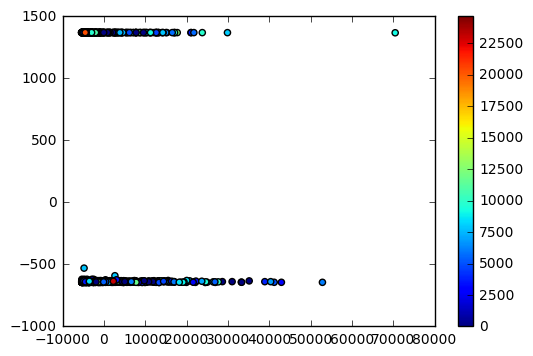

In [46]:
plt.scatter(components[::1000,0],components[::1000,1],c=data["Sales"][::1000])
plt.colorbar()

In [47]:
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(2)
components = tsne.fit_transform(data_simple.ix[::1000])

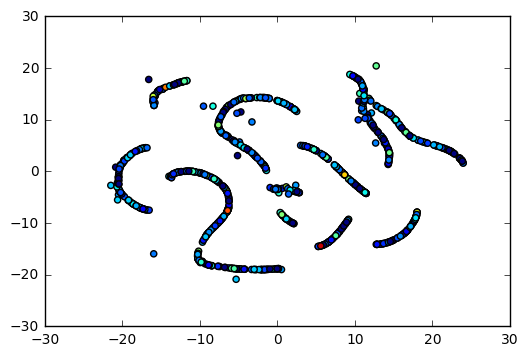

In [49]:
plt.scatter(components[:,0],components[:,1],c=data["Sales"][::1000])

In [52]:
data_ohe = pd.get_dummies(data[data.columns[1:2].tolist()+data.columns[3:-3].tolist()],
                         columns=["DayOfWeek","StoreType","Assortment","StateHoliday"]).drop("Sales",axis=1).drop("Customers",axis=1).fillna(0)   


In [54]:
clf = LinearRegression()
clf.fit(data_ohe.ix[train_idxs], data["Sales"][train_idxs])
pred = clf.predict(data_ohe.ix[test_idxs])
rmspe(data["Sales"][test_idxs], pred)

0.52017803263247553